# Predicting Authors
## A Natural Language Analysis Project


**Group Members:**

* Kali Blevins (Team Lead)
* Anais Dotis-Georgiou (Tester)
* Danny Lu (Data Engineer)
* Bharathy Natarajan (Scrum Master)

**Summary**

Using the raw datasets from the Kaggle data competition 'Spooky Author', we perform a basic natural language analysis with the aim of identifying particular authors based on a sample of their writing.

## Organize environment

In [1]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter

# initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Do we need to import this separately since we already imported the whole module?
# import 
from nltk import bigrams

### Read in training data
This data will be used to develop an identification algorithm

In [2]:
### Read our train data into a dataframe
texts = pd.read_csv("train.csv", encoding = 'latin-1')

# look at the first few rows of texts
texts.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


### Read in test data
This data will be used to test the identification algorithm

In [3]:
# read our test data into a dataframe 
test = pd.read_csv("test.csv", encoding = 'latin-1')

# look at the first few rows of test
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


## Initial data organization
* Group data by author
* Create object with all sentences for each author
* Create object with all token for each author

In [15]:
# split the data by author
byAuthor = texts.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
   
    # convert everything to lower case (so "The" and "the" get counted as 

#the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)


## Basic word & sentence structure analysis
* Average sentence length for each author
* Average word length for each author
* Total word variety for each author

### Get Avg sentence length by author

### Get Avg word length by author

In [6]:
# create empty dictionary to populate with average word length by author 
wordlengthByAuthor = {}

# for each author...
for key, value in token_dict.items():
    
    # characterizing words by different lengths
    small_words = len([w for w in value if len(w) <= 5])
    med_words = len([w for w in value if len(w) > 5 & len(w) <10])
    large_words = len([w for w in value if len(w) > 9 & len(w) <15])
    xlarge_words = len([w for w in value if len(w) > 14 & len(w) <15])
    avg_word_length = np.mean([len(w) for w in value])
    wordlengthByAuthor[key] = ([small_words, med_words, large_words, xlarge_words, avg_word_length])
    
wordlength_df = pd.DataFrame(wordlengthByAuthor, index = ['small (<5)', 'med (5-9)', 'large (10-14)', 
                                                          'xlarge (14+)', 'avg length'])
wordlength_df

,EAP,HPL,MWS
small (<5),4175.000000,3571.000000,3624.00000
med (5-9),3360.000000,2891.000000,3009.00000
large (10-14),4233.000000,3777.000000,3749.00000
xlarge (14+),2874.000000,2674.000000,2703.00000
avg length,3.990554,4.173425,4.04851


### Get total word variety by author

## Part of speech analysis

### Pronoun usage

### Other parts of speech

In [7]:
# Get parts-of-speech for each author using 
partOfSpeech = {}

for key, value in token_dict.items():
    
    partOfSpeech[key] = nltk.pos_tag(value)

partOfSpeech

{'EAP': [('this', 'DT'),
  ('process', 'NN'),
  (',', ','),
  ('however', 'RB'),
  (',', ','),
  ('afforded', 'VBD'),
  ('me', 'PRP'),
  ('no', 'DT'),
  ('means', 'NNS'),
  ('of', 'IN'),
  ('ascertaining', 'VBG'),
  ('the', 'DT'),
  ('dimensions', 'NNS'),
  ('of', 'IN'),
  ('my', 'PRP$'),
  ('dungeon', 'NN'),
  (';', ':'),
  ('as', 'IN'),
  ('i', 'NN'),
  ('might', 'MD'),
  ('make', 'VB'),
  ('its', 'PRP$'),
  ('circuit', 'NN'),
  (',', ','),
  ('and', 'CC'),
  ('return', 'NN'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('point', 'NN'),
  ('whence', 'NN'),
  ('i', 'NN'),
  ('set', 'VBN'),
  ('out', 'RP'),
  (',', ','),
  ('without', 'IN'),
  ('being', 'VBG'),
  ('aware', 'JJ'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('fact', 'NN'),
  (';', ':'),
  ('so', 'RB'),
  ('perfectly', 'RB'),
  ('uniform', 'JJ'),
  ('seemed', 'VBD'),
  ('the', 'DT'),
  ('wall', 'NN'),
  ('.', '.'),
  ('in', 'IN'),
  ('his', 'PRP$'),
  ('left', 'JJ'),
  ('hand', 'NN'),
  ('was', 'VBD'),
  ('a', 'DT'),
  ('gold', 'JJ'),
  (

In [8]:
# Count the the number of parts of speech for each author 

# create an empty dictonary to hold all of the counts
partOfSpeechCounts = {}
for name in partOfSpeech: 
     partOfSpeechCounts[name] = Counter(elem[1] for elem in partOfSpeech[name])
        
partOfSpeechCounts

{'EAP': Counter({"''": 39,
          ',': 432,
          '.': 195,
          ':': 44,
          'CC': 192,
          'CD': 26,
          'DT': 563,
          'EX': 11,
          'FW': 5,
          'IN': 675,
          'JJ': 366,
          'JJR': 9,
          'JJS': 11,
          'MD': 81,
          'NN': 905,
          'NNP': 6,
          'NNS': 203,
          'PDT': 10,
          'POS': 7,
          'PRP': 223,
          'PRP$': 118,
          'RB': 306,
          'RBR': 12,
          'RBS': 4,
          'RP': 22,
          'TO': 123,
          'UH': 1,
          'VB': 176,
          'VBD': 267,
          'VBG': 72,
          'VBN': 174,
          'VBP': 58,
          'VBZ': 61,
          'WDT': 32,
          'WP': 20,
          'WRB': 16,
          '``': 40}),
 'HPL': Counter({"''": 36,
          ',': 254,
          '.': 169,
          ':': 30,
          'CC': 216,
          'CD': 18,
          'DT': 489,
          'EX': 15,
          'FW': 1,
          'IN': 557,
          'JJ': 430

### Punctuation

In [9]:
# organize the part of speech data into a table or tables & plot punctuation & some or all part of speech entries

### Get word frequencies by author

In [10]:
# create empty dictionary to populate with frequency distribution of words by author
wordFreqByAuthor = nltk.probability.ConditionalFreqDist()

# for each author...
for key, value in token_dict.items():
    
    # calculate the frequency of each token
    frequency = nltk.FreqDist(value)

    # add the frequencies for each author to our dictionary
    wordFreqByAuthor[key] = (frequency)
    
    # now we have a dictionary where each entry is the frequency distrbution
    # of words for a specific author.    

## Sentiment analysis

In [11]:
# Sentiments analysis including : avg sentiment scores, std of sentiment scores, scatter plots for compound sentiment 
# analysis by Author 

# create empty dictionaries to contain avg sentiment values for all sentences by authors
# create empty dictionaries to contain std of sentiments for all sentences by authors
avg_compound = {}
avg_pos = {}
avg_neu = {}
avg_neg = {}

std_compound = {}
std_pos = {}
std_neu = {}
std_neg = {}

for name, group in byAuthor:
    compound = [d['compound'] for d in sentimentByAuthor[name]]
    pos = [d['pos'] for d in sentimentByAuthor[name]]
    neu = [d['neu'] for d in sentimentByAuthor[name]]
    neg = [d['neg'] for d in sentimentByAuthor[name]]
    
    avg_compound[name] = sum(compound) / len(sentimentByAuthor[name])
    avg_pos[name] = sum(pos) / len(sentimentByAuthor[name])
    avg_neu[name] = sum(neu) / len(sentimentByAuthor[name])
    avg_neg[name] = sum(neg) / len(sentimentByAuthor[name])
    
    std_compound[name] = np.std(compound, axis = None)
    std_pos[name] = np.std(pos, axis = None)
    std_neu[name] = np.std(neu, axis = None)
    std_neg[name] = np.std(neg, axis = None)
    
    # plot compound sentiment analysis for each author
    #plt.figure(figsize = (10,10))
    plt.title('Compound Sentiment Polarity for ' + name)
    plt.xlabel('Sentences')
    plt.ylabel('Sentence Polarity')
    plt.plot(np.arange(0, len(compound)), compound,  marker="o", linewidth=0.5,
         alpha=0.8)
    count = count + 1 
    plt.show()

NameError: name 'sentimentByAuthor' is not defined

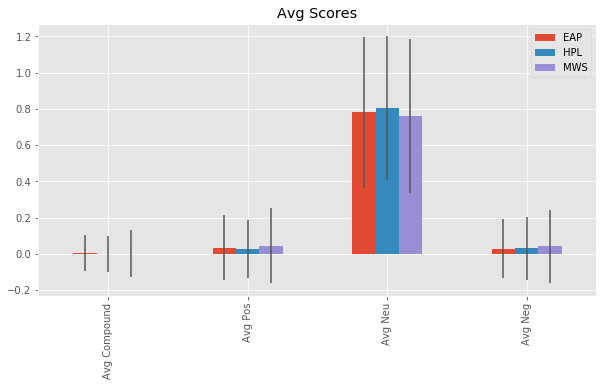

,EAP,HPL,MWS
Avg Compound,0.002665,-0.003081,0.001214
Avg Pos,0.033969,0.026825,0.045632
Avg Neu,0.780018,0.802870,0.761151
Avg Neg,0.027248,0.031192,0.042138


In [76]:
# plot bar graph of avg sentiment scores with error bars for each author 


avg_sentiments = {'EAP':[avg_compound['EAP'], avg_pos['EAP'], avg_neu['EAP'] ,avg_neg['EAP']],
                  'HPL': [avg_compound['HPL'], avg_pos['HPL'], avg_neu['HPL'] ,avg_neg['HPL']],
                  'MWS': [avg_compound['MWS'], avg_pos['MWS'], avg_neu['MWS'] ,avg_neg['MWS']]}
std_sentiments = {'EAP':[std_compound['EAP'], std_pos['EAP'], std_neu['EAP'] ,std_neg['EAP']],
                  'HPL': [std_compound['HPL'], std_pos['HPL'], std_neu['HPL'] ,std_neg['HPL']],
                  'MWS': [std_compound['MWS'], std_pos['MWS'], std_neu['MWS'] ,std_neg['MWS']]}
indexNames = ['Avg Compound', 'Avg Pos', 'Avg Neu', 'Avg Neg']
avg_sentimentsdf = pd.DataFrame(avg_sentiments, index = indexNames) 
std_sentimentsdf = pd.DataFrame(std_sentiments, index = indexNames)
    
#plt.figure(figsize = (10,10))
ax = avg_sentimentsdf.plot(kind = 'bar', title = 'Avg Scores', 
                      legend=True , yerr= std_sentimentsdf, figsize=(10, 5))
plt.show()

avg_sentimentsdf

## Predicting Authorship

In [83]:
test['text'][0]

'Still, as I urged our leaving Ireland with such inquietude and impatience, my father thought it best to yield.'

In [154]:
# There's probably a cleaner way to do this if someone wants to try...

ProbailitiesByAuthor = pd.DataFrame()

for x in np.arange(0, len(test['text'])):
    # first, let's start with a test sentence
    testSentence = test['text'][x]

    # and then lowercase & tokenize our test sentence
    preProcessedTestSentence = nltk.tokenize.word_tokenize(testSentence.lower())

    # create an empy dataframe to put our output in
    testProbailities = pd.DataFrame(columns = ['author','word','probability'])

    # For each author...
    for i in wordFreqByAuthor.keys():
        # for each word in our test sentence...
        for j  in preProcessedTestSentence:
            # find out how frequently the author used that word
            wordFreq = wordFreqByAuthor[i].freq(j)
            # and add a very small amount to every prob. so none of them are 0
            smoothedWordFreq = wordFreq + 0.000001
            # add the author, word and smoothed freq. to our dataframe
            output = pd.DataFrame([[i, j, smoothedWordFreq]], columns = ['author','word','probability'])
            testProbailities = testProbailities.append(output, ignore_index = True)

    # empty dataframe for the probability that each author wrote the sentence
    testProbailitiesByAuthor = pd.DataFrame()

    # now let's group the dataframe with our frequency by author
    for i in wordFreqByAuthor.keys():
        # get the joint probability that each author wrote each word
        oneAuthor = testProbailities.query('author == "' + i + '"')
        jointProbability = oneAuthor.product(numeric_only = True)[0]

        # and add that to our dataframe
        output = pd.DataFrame([[jointProbability]])
        testProbailitiesByAuthor = testProbailitiesByAuthor.append(output, ignore_index = True)

    ProbailitiesByAuthor = pd.concat([ProbailitiesByAuthor, testProbailitiesByAuthor], axis=1)
    # and our winner is...
    #testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author']

ProbailitiesByAuthor = ProbailitiesByAuthor.rename(index = ({0: 'EAP', 1:'HPL', 2: 'MWS'})).transpose()

In [155]:
ProbailitiesByAuthor

# This needs to be added to the test.csv document 

,EAP,HPL,MWS
0,2.486822e-78,1.190835e-73,3.240022e-67
0,1.876104e-211,1.067215e-225,4.672875e-225
0,6.278045e-129,7.728168e-123,5.692693e-128
0,4.444840e-145,2.229724e-149,7.730098e-161
0,9.906024e-42,5.879283e-46,4.614506e-38
0,6.687526e-125,3.118550e-139,7.193111e-141
0,2.175030e-44,4.934259e-45,5.602217e-46
0,6.693198e-105,1.871115e-95,1.743894e-96
0,5.372279e-94,5.748600e-100,3.239175e-103
0,7.504330e-31,6.279383e-32,5.499095e-32
